In [30]:
%matplotlib inline
from __future__ import division
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from collections import Counter

# Experiment 1

## Success Rates

In [22]:
flist = ['log_48_r1.1','log_48_r1.2','log_100_r2','log_148_r3','log_148_r4','log_200_r5','log_200_r6','log_100_r7','log_200_r8']

In [23]:
logs = []
for f in flist:
    dflog = pd.read_csv('./EvalExp1/original_logs_acl2016/'+f+'_df.csv')
    print f
    dflog['log'] = [f]*len(dflog)
    logs.append(dflog)

log_48_r1.1
log_48_r1.2
log_100_r2
log_148_r3
log_148_r4
log_200_r5
log_200_r6
log_100_r7
log_200_r8


In [24]:
all_logs = pd.concat(logs)

In [25]:
set(all_logs['success'])

{False, True, '0', 'False', 'True'}

In [26]:
suc = []
for s in all_logs['success']:
    if s == True:
        suc.append('True')
    elif s == False:
        suc.append('False')
    elif s == '0':
        suc.append('False')
    else:
        suc.append(s)
        
set(suc)

{'False', 'True'}

In [27]:
all_logs['success'] = suc
set(all_logs['success'])

{'False', 'True'}

In [28]:
total_success = []
first_success = []
second_success = []

a_success = []
b_success = []
c_success = []

for system in ['gold','saia','google','google_glen']:
    print system
    succ = len(all_logs[(all_logs['system'] == system) & (all_logs['success'] == 'True')])
    first_succ = len(all_logs[(all_logs['system'] == system) & (all_logs['success'] == 'True') & (all_logs['clicks'] == 1)])
    second_succ = len(all_logs[(all_logs['system'] == system) & (all_logs['success'] == 'True') & (all_logs['clicks'] <= 2)])

    
    succa = len(all_logs[(all_logs['system'] == system) & (all_logs['success'] == 'True') \
                         & (all_logs['testset'] == 'A')])
    totala = len(all_logs[(all_logs['system'] == system) & (all_logs['testset'] == 'A')])
    succ = len(all_logs[(all_logs['system'] == system) & (all_logs['success'] == 'True')])
    succb = len(all_logs[(all_logs['system'] == system) & (all_logs['success'] == 'True') \
                         & (all_logs['testset'] == 'B')])
    totalb = len(all_logs[(all_logs['system'] == system) & (all_logs['testset'] == 'B')])
    succc = len(all_logs[(all_logs['system'] == system) & (all_logs['success'] == 'True') \
                         & (all_logs['testset'] == 'C')])
    totalc = len(all_logs[(all_logs['system'] == system) & (all_logs['testset'] == 'C')])
    
    total = len(all_logs[(all_logs['system'] == system)])
    clicks = sum(all_logs[(all_logs['system'] == system) & (all_logs['success'] == 'True')]['clicks'])
    allclicks = sum(all_logs[(all_logs['system'] == system) ]['clicks'])
    
    print succ,total,clicks
    print "Overall success rate", succ/float(total)
    print "First trial success rate", first_succ/float(total)
    print "Average clicks in succseful trials", clicks/float(succ)
    print "Average clicks",allclicks/float(total)
    print "A",succa,totala,succa/float(totala)
    print "B",succb,totalb,succb/float(totalb)
    print "C",succc,totalc,succc/float(totalc)
    
    total_success.append(succ/float(total))
    first_success.append(first_succ/float(total))
    second_success.append(second_succ/float(total))
    
    a_success.append(succa/float(totala))
    b_success.append(succb/float(totalb))
    c_success.append(succc/float(totalc))
    
systems = ['gold','saia','google','google_glen']
d = {'total_success':pd.Series(total_success,index=systems), \
     'first_success':pd.Series(first_success,index=systems), \
     'second_success':pd.Series(second_success,index=systems), \
     'A_success':pd.Series(a_success,index=systems),\
     'B_success':pd.Series(b_success,index=systems),\
     'C_success':pd.Series(c_success,index=systems)}

evaldf = pd.DataFrame(d)

gold
293 298 329
Overall success rate 0.98322147651
First trial success rate 0.906040268456
Average clicks in succseful trials 1.1228668942
Average clicks 1.14765100671
A 107 108 0.990740740741
B 104 105 0.990476190476
C 82 85 0.964705882353
saia
138 298 199
Overall success rate 0.463087248322
First trial success rate 0.322147651007
Average clicks in succseful trials 1.44202898551
Average clicks 2.13758389262
A 35 98 0.357142857143
B 60 94 0.63829787234
C 43 106 0.405660377358
google
176 298 246
Overall success rate 0.590604026846
First trial success rate 0.41610738255
Average clicks in succseful trials 1.39772727273
Average clicks 2.0
A 49 86 0.56976744186
B 67 99 0.676767676768
C 60 113 0.530973451327
google_glen
175 298 262
Overall success rate 0.587248322148
First trial success rate 0.375838926174
Average clicks in succseful trials 1.49714285714
Average clicks 2.04362416107
A 51 102 0.5
B 71 96 0.739583333333
C 53 100 0.53


In [29]:
evaldf

,A_success,B_success,C_success,first_success,second_success,total_success
gold,0.990741,0.990476,0.964706,0.906040,0.946309,0.983221
saia,0.357143,0.638298,0.405660,0.322148,0.402685,0.463087
google,0.569767,0.676768,0.530973,0.416107,0.533557,0.590604
google_glen,0.500000,0.739583,0.530000,0.375839,0.510067,0.587248


In [17]:
resultdf = pd.DataFrame(results,columns=['system','% successful trials','% 1st click success','av. clicks',\
                                        '% successful Test A','% successful Test B','% successful Test C'])

In [18]:
resultdf

,system,% successful trials,% 1st click success,av. clicks,% successful Test A,% successful Test B,% successful Test C
0,gold,0.985348,0.901099,1.153846,0.989899,0.989796,0.973684
1,saia,0.454212,0.322344,2.131868,0.373626,0.636364,0.361702
2,google,0.582418,0.413919,2.003663,0.552632,0.685393,0.518519
3,google_glen,0.589744,0.380952,2.036630,0.473684,0.755814,0.554348


## Success rate over time

In [32]:
s_time = [0]*200

for f in ['log_200_r5','log_200_r6','log_200_r8']:
    dflog = pd.read_csv('./EvalExp1/original_logs_acl2016/'+f+'_df.csv')
    for s in range(200):
        val = dflog['success'].iloc[s]
        if val == 'True':
            s_time[s] += 1
        elif val == 'False':
            pass
        else:
            s_time[s] += int(val)        

y_s_time = []
for s in range(200):
    y_s_time.append(sum(s_time[:s+1])/(3*(s+1)))

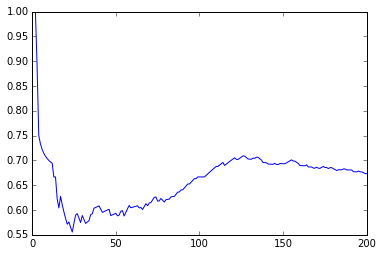

In [33]:
plt.plot(range(1,201),y_s_time)

# Experiment 2

* first read in all the log files

* you might need to adapt the file names/path

In [52]:
flist = ['log_ia_300_r1','log_ia_300_r2']
logs = []
for f in flist:
    dflog = pd.read_csv('./EvalExp2/original_logs_acl2016/'+f+'_df.csv')
    print f
    dflog['log'] = [f]*len(dflog)
    dflog['system'] = ['context-aware']*len(dflog)
    logs.append(dflog)


log_ia_300_r1
log_ia_300_r2


In [53]:
flist = ['log_ia_bl_200_r3','log_ia_bl_200_r4','log_ia_bl_200_r5']
for f in flist:
    dflog = pd.read_csv('./EvalExp2/original_logs_acl2016/'+f+'_df.csv')
    print f
    dflog['log'] = [f]*len(dflog)
    dflog['system'] = ['pattern-based']*len(dflog)
    logs.append(dflog)

log_ia_bl_200_r3
log_ia_bl_200_r4
log_ia_bl_200_r5


In [54]:
all_logs = pd.concat(logs)
suc = []
for s in all_logs['success']:
    if s == True:
        suc.append('True')
    elif s == False:
        suc.append('False')
    elif s == '0':
        suc.append('False')
    else:
        suc.append(s)
all_logs['success'] = suc


In [55]:
all_logs.head()

,Unnamed: 0,clicks,file,lastClick,log,ref1,ref2,ref3,refexp,reftype,region,start,success,system,testset
0,0,1,8756,2.007509,log_ia_300_r1,NaN,NaN,NaN,"('guy in the middle in front', 'guy in the mid...",test,10,0.000000,True,context-aware,T
1,1,3,9415,2.420646,log_ia_300_r1,NaN,NaN,NaN,"('orange thing on left', 'doorway or house thi...",a2,12,2.186790,False,context-aware,A
2,2,2,7063,2.582398,log_ia_300_r1,NaN,NaN,NaN,"('bottom left', 'ground bottom left corner', '...",a1,4,2.473041,True,context-aware,A
3,3,2,37098,2.819412,log_ia_300_r1,NaN,NaN,NaN,"('car in middle left', 'van or car in middle l...",a2,3,2.626567,True,context-aware,A
4,4,1,40188,2.953601,log_ia_300_r1,NaN,NaN,NaN,"('in front', 'guy in front center', 'animal or...",a1,1,2.873322,True,context-aware,A


* calculate various measures of referential success

In [56]:
total_success = []
first_success = []
second_success = []

a_success = []
b_success = []
c_success = []

for system in ['pattern-based','context-aware']:
    print system
    succ = len(all_logs[(all_logs['system'] == system) & (all_logs['success'] == 'True')])
    first_succ = len(all_logs[(all_logs['system'] == system) & (all_logs['success'] == 'True') & (all_logs['clicks'] == 1)])
    second_succ = len(all_logs[(all_logs['system'] == system) & (all_logs['success'] == 'True') & (all_logs['clicks'] <= 2)])

    
    succa = len(all_logs[(all_logs['system'] == system) & (all_logs['success'] == 'True') \
                         & (all_logs['testset'] == 'A')])
    totala = len(all_logs[(all_logs['system'] == system) & (all_logs['testset'] == 'A')])
    succ = len(all_logs[(all_logs['system'] == system) & (all_logs['success'] == 'True')])
    succb = len(all_logs[(all_logs['system'] == system) & (all_logs['success'] == 'True') \
                         & (all_logs['testset'] == 'B')])
    totalb = len(all_logs[(all_logs['system'] == system) & (all_logs['testset'] == 'B')])
    succc = len(all_logs[(all_logs['system'] == system) & (all_logs['success'] == 'True') \
                         & (all_logs['testset'] == 'C')])
    totalc = len(all_logs[(all_logs['system'] == system) & (all_logs['testset'] == 'C')])
    
    total = len(all_logs[(all_logs['system'] == system)])
    clicks = sum(all_logs[(all_logs['system'] == system) & (all_logs['success'] == 'True')]['clicks'])
    allclicks = sum(all_logs[(all_logs['system'] == system) ]['clicks'])
    
    print succ,total,clicks
    print "Overall success rate", succ/float(total)
    print "First trial success rate", first_succ/float(total)
    print "Average clicks in succseful trials", clicks/float(succ)
    print "Average clicks",allclicks/float(total)
    print "A",succa,totala,succa/float(totala)
    print "B",succb,totalb,succb/float(totalb)
    print "C",succc,totalc,succc/float(totalc)
    
    total_success.append(succ/float(total))
    first_success.append(first_succ/float(total))
    second_success.append(second_succ/float(total))
    
    a_success.append(succa/float(totala))
    b_success.append(succb/float(totalb))
    c_success.append(succc/float(totalc))
    
systems = ['pattern-based','context-aware']
d = {'total_success':pd.Series(total_success,index=systems), \
     'first_success':pd.Series(first_success,index=systems), \
     'second_success':pd.Series(second_success,index=systems), \
     'A_success':pd.Series(a_success,index=systems),\
     'B_success':pd.Series(b_success,index=systems),\
     'C_success':pd.Series(c_success,index=systems)}

evaldf = pd.DataFrame(d)

pattern-based
488 603 766
Overall success rate 0.809286898839
First trial success rate 0.467661691542
Average clicks in succseful trials 1.56967213115
Average clicks 1.83250414594
A 160 198 0.808080808081
B 167 198 0.843434343434
C 158 204 0.774509803922
context-aware
518 602 799
Overall success rate 0.860465116279
First trial success rate 0.504983388704
Average clicks in succseful trials 1.54247104247
Average clicks 1.74086378738
A 172 200 0.86
B 175 200 0.875
C 169 200 0.845


In [48]:
evaldf

,A_success,B_success,C_success,first_success,second_success,total_success
pattern-based,0.808081,0.843434,0.77451,0.467662,0.691542,0.809287
context-aware,0.860000,0.875000,0.84500,0.504983,0.749169,0.860465


## Learning Curves

* now calculate success rates over time

In [50]:
s_time = [0]*200

for f in ['log_ia_300_r1','log_ia_300_r2']:
    dflog = pd.read_csv('./EvalExp2/original_logs_Acl2016/'+f+'_df.csv')
    for s in range(200):
        val = dflog['success'].iloc[s]
        if val == 'True':
            s_time[s] += 1
        elif val == 'False':
            pass
        else:
            s_time[s] += int(val)        

y_s_time = []
for s in range(200):
    y_s_time.append(sum(s_time[:s+1])/(2*(s+1)))
    
s_time = [0]*200

for f in ['log_ia_bl_200_r3','log_ia_bl_200_r4','log_ia_bl_200_r5']:
    dflog = pd.read_csv('./EvalExp2/original_logs_acl2016/'+f+'_df.csv')
    for s in range(200):
        val = dflog['success'].iloc[s]
        if val == 'True':
            s_time[s] += 1
        elif val == 'False':
            pass
        else:
            s_time[s] += int(val)        

y_s_time_bl = []
for s in range(200):
    y_s_time_bl.append(sum(s_time[:s+1])/(3*(s+1)))
    
s_time = [0]*200

for f in ['log_200_r5','log_200_r6','log_200_r8']:
    dflog = pd.read_csv('./EvalExp1/original_logs_acl2016/'+f+'_df.csv')
    for s in range(200):
        val = dflog['success'].iloc[s]
        if val == 'True':
            s_time[s] += 1
        elif val == 'False':
            pass
        else:
            s_time[s] += int(val)        

y_s_time_no = []
for s in range(200):
    y_s_time_no.append(sum(s_time[:s+1])/(3*(s+1)))

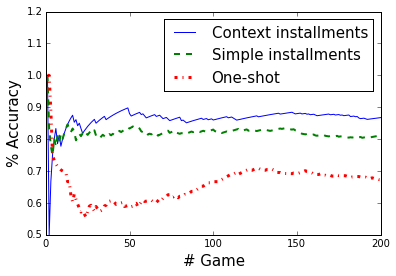

In [51]:
plt.plot(range(1,201),y_s_time,label="Context installments")
plt.plot(range(1,201),y_s_time_bl,linestyle="dashed",lw=2,label="Simple installments")
plt.plot(range(1,201),y_s_time_no,linestyle="dashdot",lw=3,label="One-shot")
plt.xlabel("# Game",fontsize=15)
plt.ylabel("% Accuracy",fontsize=15)
plt.ylim(0.5,1.2)
plt.legend(fontsize=15)
plt.savefig("learningcurves.pdf")